In [42]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix as sm
import matplotlib.pyplot as plt
from sklearn import datasets 
from numpy.matlib import repmat

In [43]:
def MOG(n, mu, covmat):
    return

In [44]:
wine = datasets.load_wine()
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
print(wine['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


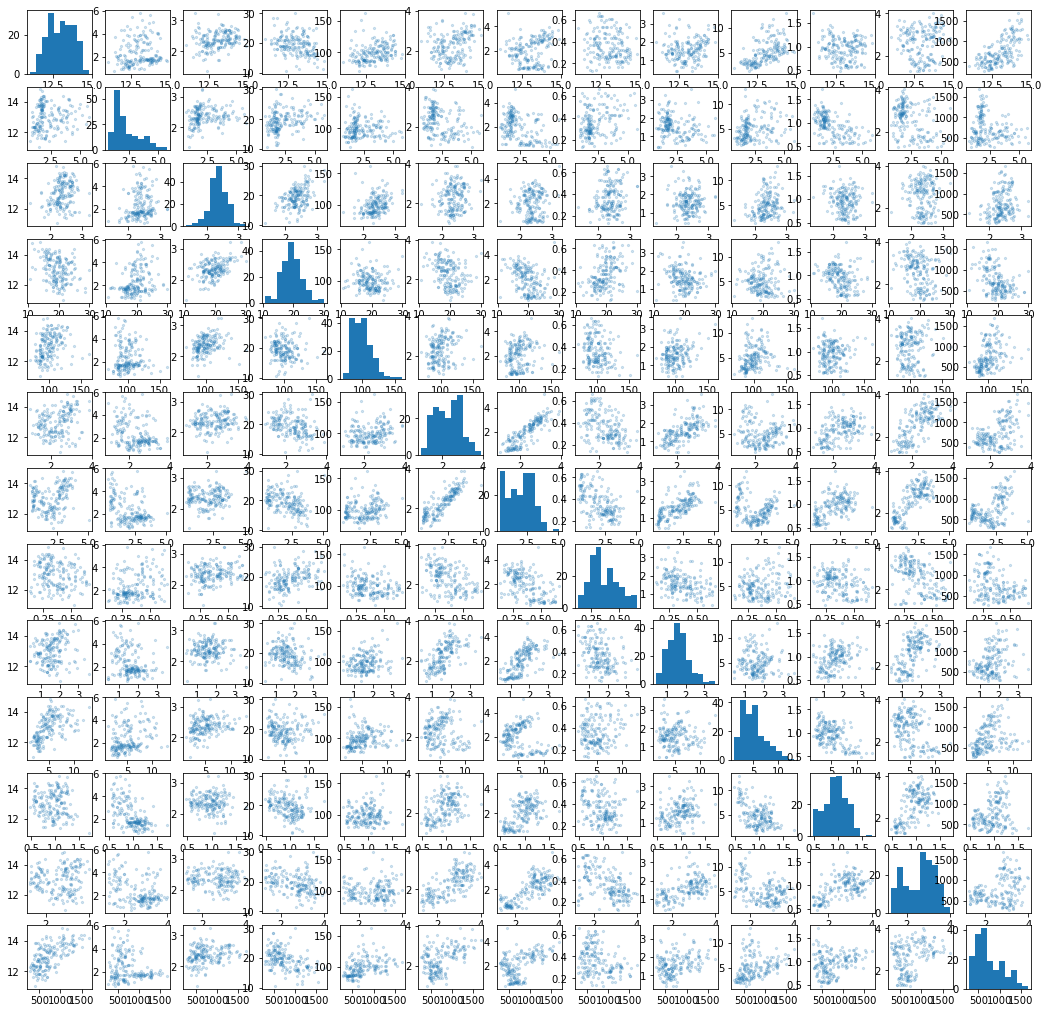

In [45]:
# Scatter plot
features = wine['feature_names']
figure, axs = plt.subplots(13,13, figsize = (18,18))

for i,attribute_1 in enumerate(features):
    for j,attribute_2 in enumerate(features):
        if i == j:
            axs[i,j].hist(df[attribute_1])
        else:
            axs[i,j].scatter(df[attribute_1], df[attribute_2], 20, marker=".", alpha=0.2)

plt.show()

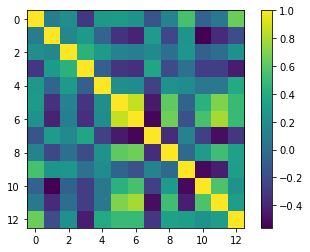

In [46]:
correlation = df.corr()

plt.imshow(correlation, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

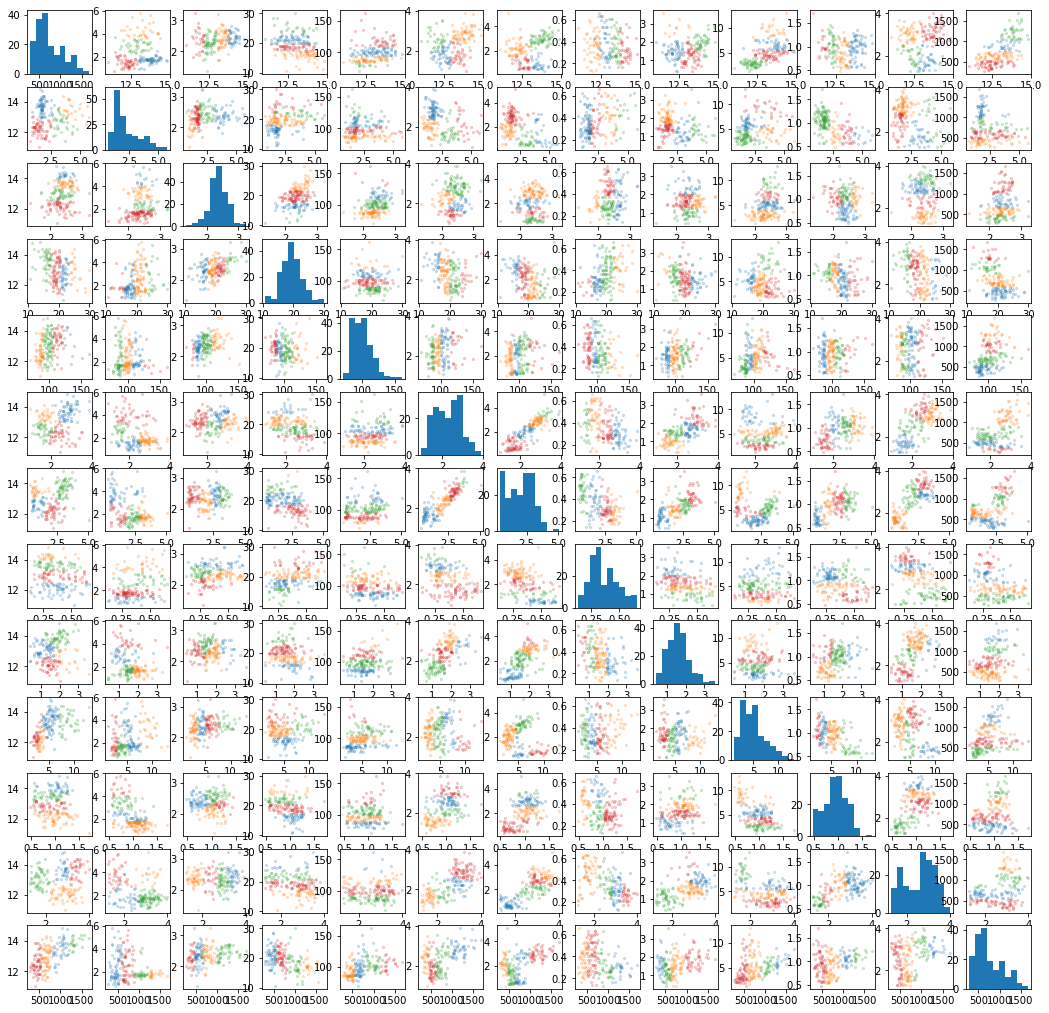

In [72]:
def initialize_mus(datapoints, k):
    mus = datapoints.copy()
    np.random.shuffle(mus)
    mus = mus[:k]
    return mus

def find_nearest_mu(datapoints, mus):
    distances = []
    for point in datapoints:
        mu_dist = []
        for k in range(len(mus)):
            dist = np.linalg.norm(point-mus[k])
            mu_dist = np.append(mu_dist, dist)
        distances = np.append(distances, np.argmin(mu_dist))
    return distances

def change_mus(datapoints, distances):
    new_mus = np.zeros((k, 2))
    counts = [0]*k
    for i in range(len(datapoints)):
        nearest_mu = int(distances[i])
        new_mus[nearest_mu] = np.add(new_mus[nearest_mu], datapoints[i])
        counts[nearest_mu] += 1
    counts = np.array(counts)
    counts = np.matlib.repmat(counts, 2, 1)
    new_mus = np.divide(new_mus, counts.T)
    return new_mus

# K-means algorithm
figure, axs = plt.subplots(13,13, figsize = (18,18))

for i in range(13):
    for j in range(13):
        if i != j:
            data = wine['data']
            feature1 = np.array(data[:,i])
            feature2 = np.array(data[:,j])
            datapoints = np.column_stack((feature1,feature2))
            k = 4
            mus = initialize_mus(datapoints, k)
            epochs = 5
            for _ in range(epochs):
                distances = find_nearest_mu(datapoints, mus)
                mus = change_mus(datapoints, distances)

            nearest_mus = find_nearest_mu(datapoints, mus)
            
            for k in range(k):
                x = np.array([])
                y = np.array([])
                for index in range(len(nearest_mus)):
                    if nearest_mus[index] == k:
                        x = np.append(x, feature1[index])
                        y = np.append(y, feature2[index])
                axs[i,j].scatter(x, y, 20, marker=".", alpha=0.2)
        if i == j:
            axs[i,j].hist(feature1)
plt.show()